# Prueba de selección Pactia

## Carga de datos y exploración de archivos

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

Se utilizan comandos de bash para entender los datos que se tienen:

In [2]:
%%bash
ls variables_externas/

ipc.xlsx
tasa_desempleo.xlsx
trm.xlsx


In [3]:
%%bash
ls variables_internas/

test.xlsx
train.xlsx


Listamos los archivos dentro de las carpetas para tener un mapeo de los mismos (y en caso tal de que sean numerosos, iterar sobre su lectura)

In [4]:
variables_externas=os.listdir("variables_externas/")
pve = "variables_externas/"
print(variables_externas)

['ipc.xlsx', 'tasa_desempleo.xlsx', 'trm.xlsx']


Leemos los archivos

In [5]:
ipc = pd.read_excel(pve+variables_externas[0])
tasa_desempleo = pd.read_excel(pve+variables_externas[1])
trm = pd.read_excel(pve+variables_externas[2])

In [6]:
variables_internas=os.listdir("variables_internas/")
pvi = "variables_internas/"

In [7]:
test =  pd.read_excel(pvi+variables_internas[0])
train =  pd.read_excel(pvi+variables_internas[1])

### Exploración de variables

Esta exploración es con fines de entender la composición de las variables, qué tipos son, esto permitirá quitar o transformar algunas rápidamente.

In [8]:
ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Mes                      7291 non-null   object        
 1   Año                      7291 non-null   int64         
 2   Año(aaaa)-Mes(mm)        7291 non-null   object        
 3   Fecha (DD/MM/AAAA)       7291 non-null   object        
 4   Ciudad                   7291 non-null   object        
 5   Orden                    7291 non-null   int64         
 6   IPC                      7291 non-null   float64       
 7   Variación anual %        7037 non-null   float64       
 8   Variación año corrido %  7290 non-null   float64       
 9   Variación mensual %      7290 non-null   float64       
 10  Nivel Id                 7291 non-null   int64         
 11  Gasto Id                 7291 non-null   int64         
 12  Año mes                  7291 non-

In [9]:
ipc=ipc.drop(['Mes','Año','Año(aaaa)-Mes(mm)','Fecha (DD/MM/AAAA)','Año mes','año','mes'], axis=1)

In [10]:
tasa_desempleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Año(aaaa)-Mes(mm)         246 non-null    object        
 1   Mes nombre español        246 non-null    object        
 2   Id agrupacion             246 non-null    int64         
 3   Tasa empleo               246 non-null    float64       
 4   Tasa desempleo            246 non-null    float64       
 5   Fecha cargue maxima       246 non-null    int64         
 6   Version                   246 non-null    object        
 7   Codigo metodologia        246 non-null    int64         
 8   'Metodología: '           246 non-null    object        
 9   Descripcion  metodologia  246 non-null    object        
 10  fecha                     246 non-null    datetime64[ns]
 11  año                       246 non-null    int64         
 12  mes                   

In [11]:
tasa_desempleo=tasa_desempleo.drop(['Mes nombre español','Año(aaaa)-Mes(mm)','año','mes'], axis=1)

In [12]:
trm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   10844 non-null  datetime64[ns]
 1   trm     10844 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.6 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               217 non-null    datetime64[ns]
 1   mes                 217 non-null    int64         
 2   año                 217 non-null    int64         
 3   trafico_dia         217 non-null    float64       
 4   categoria           217 non-null    object        
 5   venta_diaria        217 non-null    float64       
 6   area_total_ocupada  217 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 12.0+ KB


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               4343 non-null   datetime64[ns]
 1   mes                 4343 non-null   int64         
 2   año                 4343 non-null   int64         
 3   trafico_dia         4343 non-null   float64       
 4   categoria           4343 non-null   object        
 5   venta_diaria        4343 non-null   float64       
 6   area_total_ocupada  4343 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 237.6+ KB


## Análisis exploratorio y estadística descriptiva

Se realizará un análisis descriptivo de las bases de datos, las variables externas estarán condicionadas a las internas, es decir, tomaremos las fechas en común y descartaremos el resto.

In [15]:
train["particion"] = "train"
test["particion"] = "test"

In [16]:
full_union_df = pd.concat([train,test]).drop(['mes','año'],axis=1)

In [17]:
full_union_df.head()

,fecha,trafico_dia,categoria,venta_diaria,area_total_ocupada,particion
0,2019-01-01,4481.0,COMIDAS Y BARES,3.487444e+07,721.903,train
1,2019-01-01,4481.0,ENTRETENIMIENTO,4.204079e+06,1883.453,train
2,2019-01-01,4481.0,HIPERMERCADO,2.318765e+07,6225.960,train
3,2019-01-01,4481.0,HOGAR,3.491659e+04,104.078,train
4,2019-01-01,4481.0,MODA Y CALZADO,9.370870e+06,2399.566,train


Ahora se unirá la información exógena.

In [18]:
full_union_df = full_union_df.merge(
    ipc, how='left', on='fecha').merge(
    tasa_desempleo, how='left', on='fecha').merge(
    trm, how='left', on='fecha')

In [19]:
full_union_df.head(6)

,fecha,trafico_dia,categoria,venta_diaria,area_total_ocupada,particion,Ciudad,Orden,IPC,Variación anual %,...,Gasto Id,Id agrupacion,Tasa empleo,Tasa desempleo,Fecha cargue maxima,Version,Codigo metodologia,'Metodología: ',Descripcion metodologia,trm
0,2019-01-01,4481.0,COMIDAS Y BARES,3.487444e+07,721.903,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
1,2019-01-01,4481.0,ENTRETENIMIENTO,4.204079e+06,1883.453,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
2,2019-01-01,4481.0,HIPERMERCADO,2.318765e+07,6225.960,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
3,2019-01-01,4481.0,HOGAR,3.491659e+04,104.078,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
4,2019-01-01,4481.0,MODA Y CALZADO,9.370870e+06,2399.566,train,NaN,NaN,NaN,NaN,...,NaN,3.0,55.333559,12.795458,2.019012e+15,Ultima,2.0,Metodología:,Proyecciones calculadas en 2012,3249.75
5,2019-01-02,9163.0,COMIDAS Y BARES,3.048469e+07,721.903,train,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3249.75


In [20]:
full_union_df.columns

Index(['fecha', 'trafico_dia', 'categoria', 'venta_diaria',
       'area_total_ocupada', 'particion', 'Ciudad', 'Orden', 'IPC',
       'Variación anual %', 'Variación año corrido %', 'Variación mensual %',
       'Nivel Id', 'Gasto Id', 'Id agrupacion', 'Tasa empleo',
       'Tasa desempleo', 'Fecha cargue maxima', 'Version',
       'Codigo metodologia', ''Metodología: '', 'Descripcion  metodologia',
       'trm'],
      dtype='object')

In [21]:
full_union_df.index = full_union_df.fecha

A continuación realizamos una descripción básica de los datos, tanto para variables numéricas como categóricas, con el fin de observar sus magnitudes, rangos, modas, etc.

In [22]:
full_union_df.describe(include='all', datetime_is_numeric=True)

,fecha,trafico_dia,categoria,venta_diaria,area_total_ocupada,particion,Ciudad,Orden,IPC,Variación anual %,...,Gasto Id,Id agrupacion,Tasa empleo,Tasa desempleo,Fecha cargue maxima,Version,Codigo metodologia,'Metodología: ',Descripcion metodologia,trm
count,7860,7860.000000,7860,7.860000e+03,7860.000000,7860,3450,3450.000000,3450.000000,3395.000000,...,3450.0,150.0,150.000000,150.000000,1.500000e+02,150,150.0,150,150,7860.000000
unique,NaN,NaN,8,NaN,NaN,2,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN
top,NaN,NaN,COMIDAS Y BARES,NaN,NaN,train,"Bogotá, D.C.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ultima,NaN,Metodología:,Proyecciones calculadas en 2012,NaN
freq,NaN,NaN,1415,NaN,NaN,7489,150,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,150,NaN,150,150,NaN
mean,2020-03-22 22:41:02.290076416,8079.891157,NaN,3.126633e+07,2112.604098,NaN,NaN,12.000000,104.271757,2.756074,...,0.0,3.0,52.842363,13.763093,2.019803e+15,NaN,2.0,NaN,NaN,3520.101712
min,2019-01-01 00:00:00,1325.000000,NaN,7.983494e-06,47.450000,NaN,NaN,1.000000,100.250000,-1.370000,...,0.0,3.0,41.570360,9.250949,2.019012e+15,NaN,2.0,NaN,NaN,3072.010000
25%,2019-08-27 18:00:00,6665.000000,NaN,2.015301e+06,156.104000,NaN,NaN,6.000000,102.840000,1.940000,...,0.0,3.0,50.631096,10.716077,2.019082e+15,NaN,2.0,NaN,NaN,3339.190000
50%,2020-04-14 00:00:00,8166.500000,NaN,1.269216e+07,1475.331000,NaN,NaN,12.000000,104.320000,2.940000,...,0.0,3.0,53.411028,13.311192,2.020042e+15,NaN,2.0,NaN,NaN,3507.110000
75%,2020-10-31 00:00:00,10033.000000,NaN,4.796437e+07,2646.423000,NaN,NaN,18.000000,105.740000,3.670000,...,0.0,3.0,56.335644,15.885255,2.020102e+15,NaN,2.0,NaN,NaN,3736.910000
max,2021-03-31 00:00:00,15921.000000,NaN,2.861563e+08,6225.960000,NaN,NaN,23.000000,109.110000,5.830000,...,0.0,3.0,57.847793,21.378492,2.021032e+15,NaN,2.0,NaN,NaN,4153.910000


### Tráfico día

El tráfico día se comporta igual para todas las categorías, ya que este tiene que ver con el flujo de personas que ingresan a los cc, por lo tanto, basta con ver una sola categoría para ver su comportmaiento.

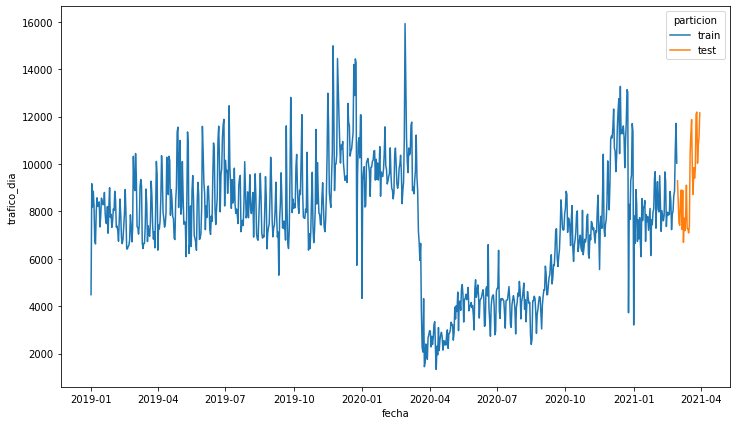

In [23]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trafico_dia', hue='particion', data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
plt.show()

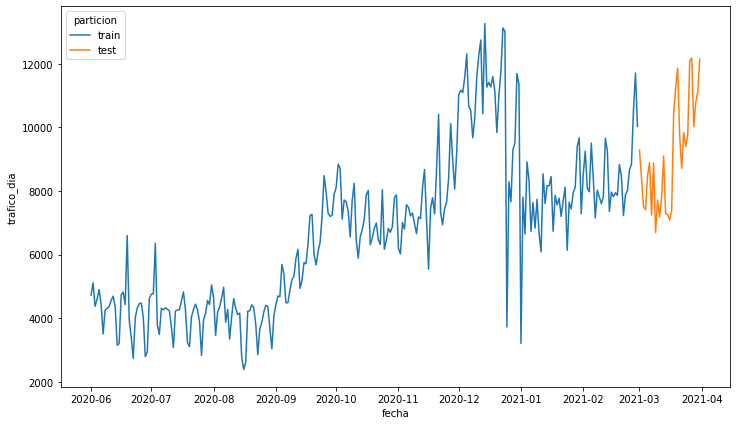

In [24]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trafico_dia', hue='particion', data=full_union_df[full_union_df.categoria=='OTROS'])
plt.show()

**Se observa** que el tráfico día tiene un comportamiento estacionario con un pico importante en 2020 debido a la **pandemia**, no todas las categorías tienen el mismo registro histórico, como se evidencia en _OTROS_ y _COMIDAS Y BARES_.

### venta diaria

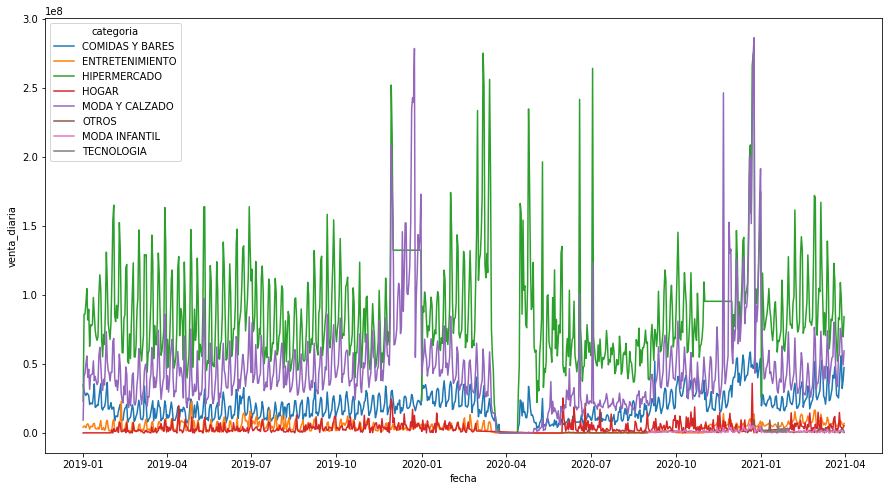

In [25]:
plt.figure(figsize=(15,8))
sns.lineplot(x='fecha',y='venta_diaria', hue='categoria', data=full_union_df)
plt.show()

Hay claramente diferencia en el monto de las ventas de algunas categorías respecto a otras, por ejemplo, _HIPERMERCADO_ es la categoría que más vende, seguida de _MODA Y CALZADO_, lo que sugiere tener en cuenta esta variable ya sea para realizar un modelo predictivo por categoría o un modelo que tenga en cuenta esta variable para ajustar las predicciones. El efecto estacional se puede ver más claramente en un año:

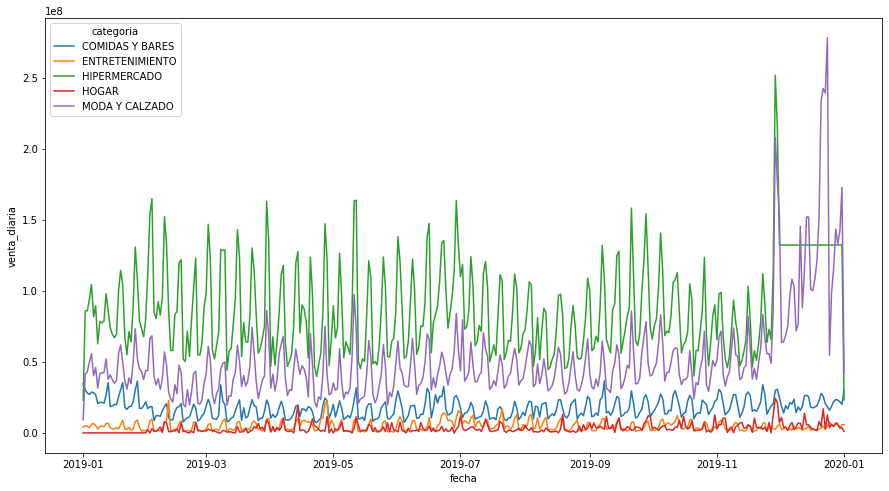

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(x='fecha',y='venta_diaria', hue='categoria', data=full_union_df[full_union_df.fecha<='2020-01-01'])
plt.show()

Se observa además que la categoría _MODA Y CALZADO_ supera en ventas a la categoría _HIPERMERCADO_ en diciembre, por lo que el mes juega también un papel importante. Cabe resaltar que una variable que debe añadirse es la pandemia:

### Añadimos variable _pandemia_

La pandemia afectó principalmente el comercio y las interacciones sociales en el 2020, por lo que usaremos este año como marcador de pandemia en el comportamiento de acuerdo al seiguiente [decreto](https://dapre.presidencia.gov.co/normativa/normativa/DECRETO%20655%20DEL%2028%20DE%20ABRIL%20DE%202022.pdf):

In [27]:
full_union_df['pandemia'] = np.where( np.logical_and(full_union_df.fecha >='2020-03-20',
                                       full_union_df.fecha <='2020-12-31'), '1', '0')

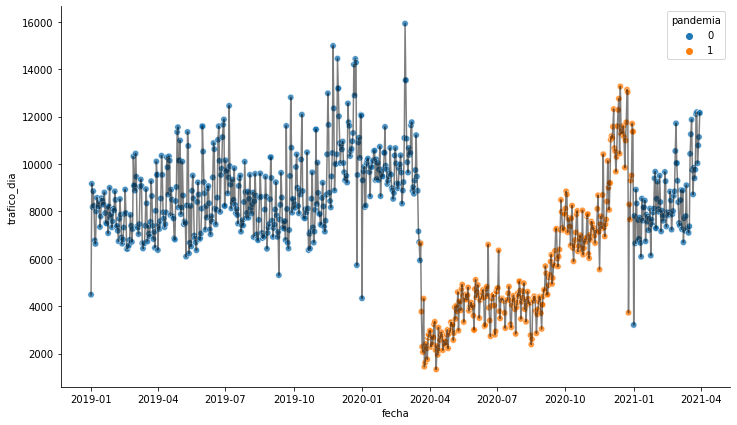

In [28]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trafico_dia',  color='black', alpha=0.5,
             data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
sns.scatterplot(x='fecha',y='trafico_dia', hue='pandemia', s=40, alpha=0.8,
             data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
sns.despine()
plt.show()

Se observa que la pandemia genera un cambio estructural en la serie de las ventas.

### Ciudad

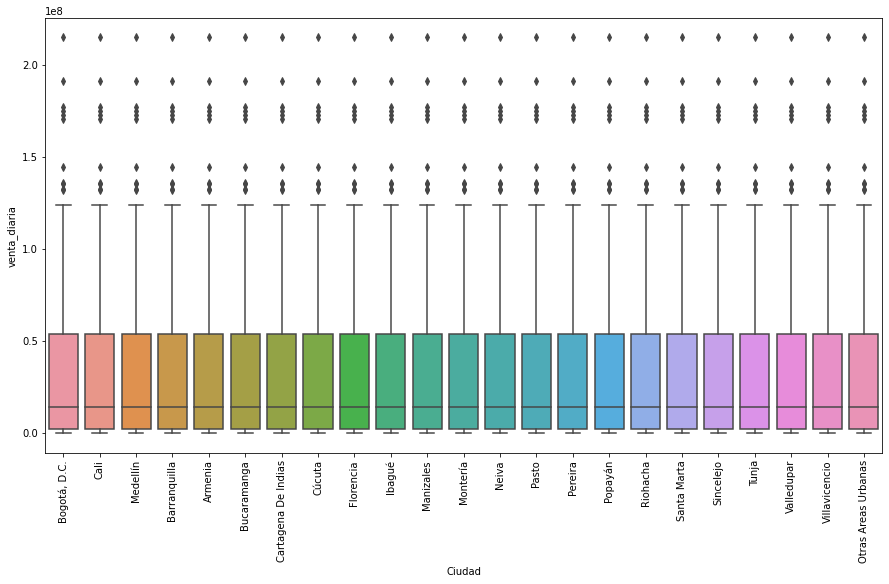

In [29]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Ciudad',y='venta_diaria', data=full_union_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

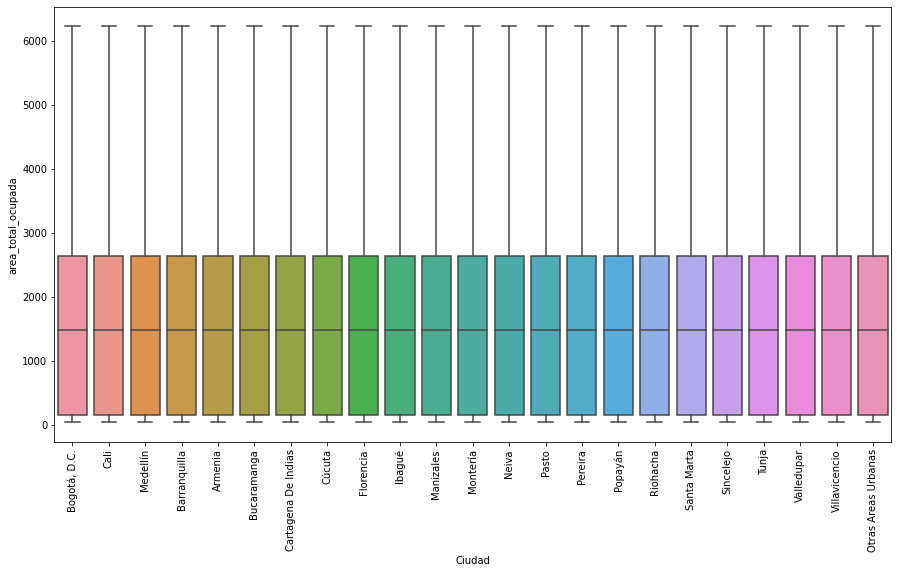

In [30]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Ciudad',y='area_total_ocupada', data=full_union_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

La ciudad no discrimina en este caso por ventas o espacio total ocupado, por lo que no se tomará en cuenta para posteriores análisis.

### IPC

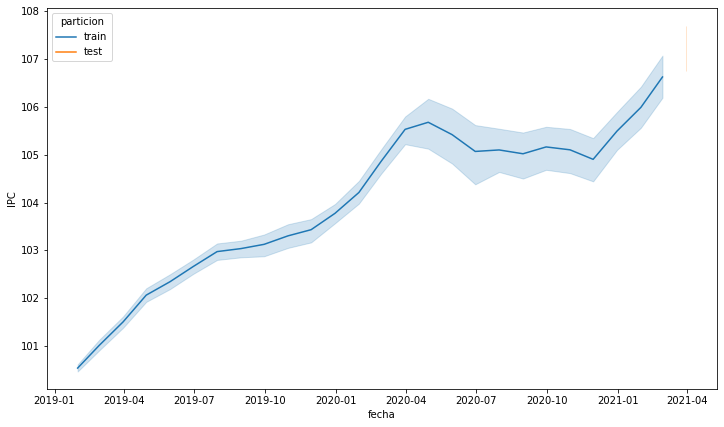

In [31]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='IPC', hue='particion', data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
plt.show()

Como es una medida mensual, se observa un incremento en el tiempo pero no una estacionalidad intrames, veremos más adelante si este se relaciona con otras variables. No tiene valores en el test, por lo que a menos que se estime, no podrá ser incluida.

### Tasa de desempleo

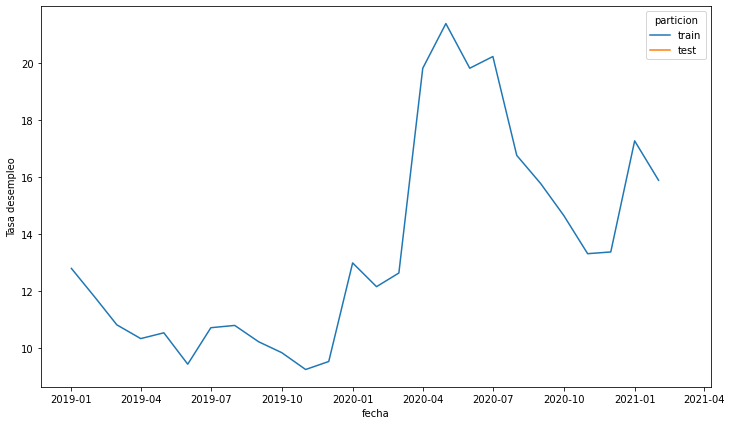

In [32]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='Tasa desempleo', hue='particion', data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
plt.show()

La tasa de desempleo aumentó pospandemia, lo cual indica un impacto macroeconómico de la misma, para utilizarla en el modelo, se debe tener registro en el test set, lo cual no está disponible, una posible medida es predecir esta tasa para el test y así usarla como covariable, pero se estaría introducinedo mayor incertidumbre del efecto de esta variable en las ventas.

### TRM

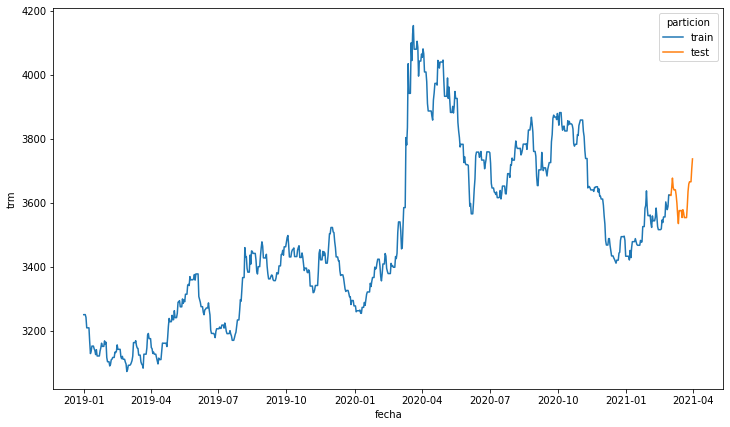

In [33]:
plt.figure(figsize=(12,7))
sns.lineplot(x='fecha',y='trm', hue='particion', data=full_union_df[full_union_df.categoria=='COMIDAS Y BARES'])
plt.show()

La tasa representativa del mercado tiene valores acordes a la granularidad de los datos y además tiene valores para el test, por lo que es una covariable que no necesita preprocesamiento inicial para ser incluida.

## Análisis bivariado

Una variable importante categórica es el tipo _categoría_, por lo que la usaremos como factor discriminante en un análisis de correlación de las variables cuantitativas.

<Figure size 864x864 with 0 Axes>

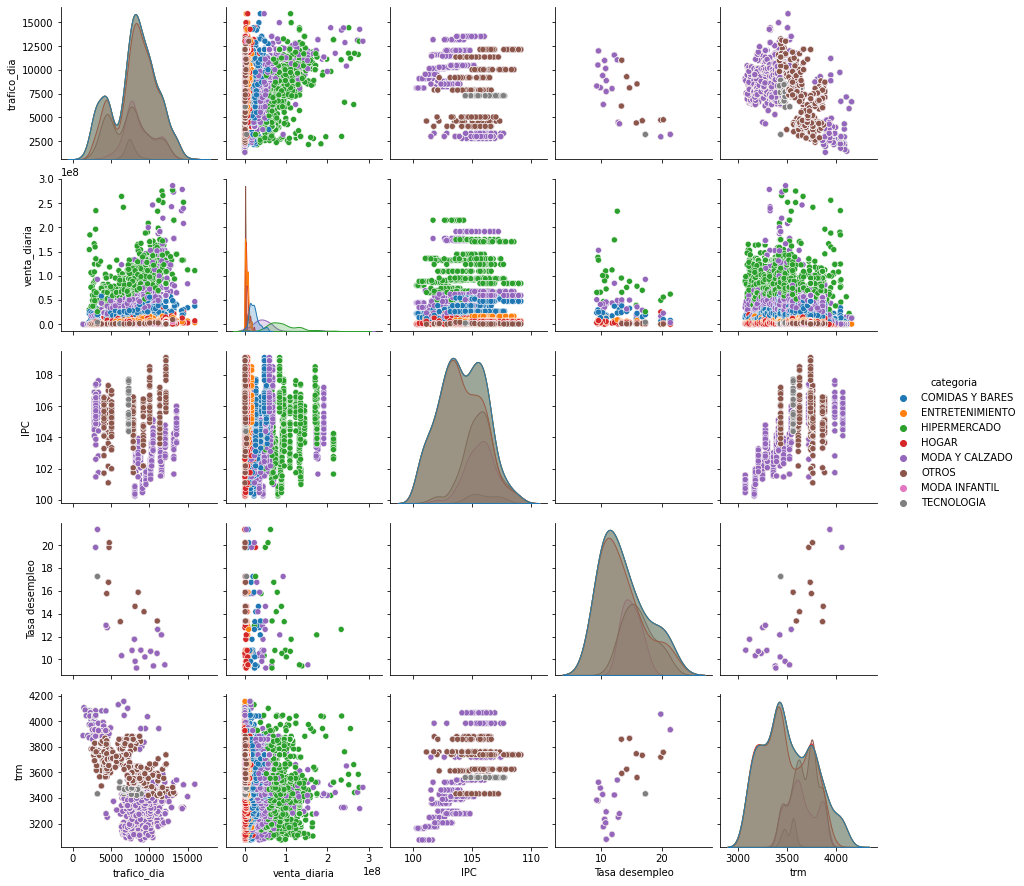

In [34]:
plt.figure(figsize=(12,12))
pairplot=sns.pairplot(full_union_df[['trafico_dia', 'categoria', 'venta_diaria','IPC','Tasa desempleo','trm']],
            hue='categoria')
plt.show()

## Entrenamiento de modelos

Existen varios enfoques para atacar el problema de la predicción de las ventas, uno viene dado desde las series de tiempo, que tiene un esfuerzo mayor de analítica pero que en la implementación de modelos como _Prophet_, _SARIMAX_, se puede obtener un buen ajuste de la serie. Para este caso y por lo rápido del análisis, propondremos dos modelos de aprendizaje de máquinas, cuya estructura es no paramétrica por lo que la interpretabilidad se diluye, pero ganamos potencia en la flexibilidad y en la búsqueda de patrones no lineales. Usaremos un XGBoost y un RandomForest.

Para esto, obtendremos variables de estacionalidad de la fecha, lo que nos dará un mejor ajuste:

In [35]:
variables_entrenamiento=['fecha', 'trafico_dia', 'categoria', 'venta_diaria',
       'area_total_ocupada', 'particion', 'Orden', 'Codigo metodologia', 'trm', 'pandemia']

In [36]:
full_variables_to_train = full_union_df.copy()[variables_entrenamiento]

In [37]:
full_variables_to_train['mes'] = full_variables_to_train.fecha.dt.month
full_variables_to_train['dia'] = full_variables_to_train.fecha.dt.day
full_variables_to_train['weekday'] = full_variables_to_train.fecha.dt.weekday
full_variables_to_train['quarter'] = full_variables_to_train.fecha.dt.quarter

Una vez seleccionadas las variables, realizamos la división en train, test. Convertiré las variables a dummies, esto ya que se ha reportado que esta transformación se traduce en un mejor desempeño de los modelos, por lo que probaremos este hallazgo, además ciertos modelos como el XGBoost no admiten datos categóricos:

In [38]:
full_variables_to_train_dummies = pd.get_dummies(full_variables_to_train.copy(),drop_first=True)

In [39]:
X_train_dummies, y_train_dummies, X_test_dummies, y_test_dummies = [
    full_variables_to_train_dummies[full_variables_to_train_dummies.particion_train==1].drop(['venta_diaria','fecha'], axis=1),
    full_variables_to_train_dummies.venta_diaria[full_variables_to_train_dummies.particion_train==1],
    full_variables_to_train_dummies[full_variables_to_train_dummies.particion_train==0].drop(['venta_diaria','fecha'], axis=1),
    full_variables_to_train_dummies.venta_diaria[full_variables_to_train_dummies.particion_train==0]
]

Finalmente, importamos las librerías para el entrenamiento de los modelos:

In [40]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

Escribimos una función que genere un informe del modelo, de tal forma que podamos escoger el mejor modelo basándonos en alguno de los criterios dados a continuación:

In [41]:
def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
    return metrics

### Modelo XGBoost

El modelo XGBoost es un potente modelo basado en Boosting que refuerza secuencialmente un árbol hasta hacer un predictor fuerte.

In [42]:
dtrain=xgb.DMatrix(X_train_dummies, label=y_train_dummies)
dtest=xgb.DMatrix(X_test_dummies, label=y_test_dummies)

In [43]:
parametros = {"booster":"gbtree", "max_depth": 4, "eta": 0.22, "objective": "reg:gamma", "nthread":5,"gamma":10,
             'seed':4}
rondas = 1200

In [44]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [45]:
modelo_xgb = xgb.train(parametros, dtrain, rondas,evallist, early_stopping_rounds=20)

[0]	eval-gamma-nloglik:45341472.00000	train-gamma-nloglik:50423488.00000
[1]	eval-gamma-nloglik:36387380.00000	train-gamma-nloglik:40465808.00000
[2]	eval-gamma-nloglik:29201566.00000	train-gamma-nloglik:32474570.00000
[3]	eval-gamma-nloglik:23434808.00000	train-gamma-nloglik:26061428.00000
[4]	eval-gamma-nloglik:18806870.00000	train-gamma-nloglik:20914814.00000
[5]	eval-gamma-nloglik:15092860.00000	train-gamma-nloglik:16784530.00000
[6]	eval-gamma-nloglik:12112305.00000	train-gamma-nloglik:13469890.00000
[7]	eval-gamma-nloglik:9720353.00000	train-gamma-nloglik:10809854.00000
[8]	eval-gamma-nloglik:7800767.00000	train-gamma-nloglik:8675108.00000
[9]	eval-gamma-nloglik:6260262.50000	train-gamma-nloglik:6961932.00000
[10]	eval-gamma-nloglik:5023979.50000	train-gamma-nloglik:5587077.50000
[11]	eval-gamma-nloglik:4031836.75000	train-gamma-nloglik:4483737.00000
[12]	eval-gamma-nloglik:3235625.75000	train-gamma-nloglik:3598292.75000
[13]	eval-gamma-nloglik:2596650.75000	train-gamma-nloglik:2

[128]	eval-gamma-nloglik:2.12195	train-gamma-nloglik:2.00002
[129]	eval-gamma-nloglik:2.12195	train-gamma-nloglik:2.00002
[130]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00001
[131]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00001
[132]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00001
[133]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00001
[134]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00000
[135]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00000
[136]	eval-gamma-nloglik:2.12194	train-gamma-nloglik:2.00000
[137]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[138]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[139]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[140]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[141]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[142]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[143]	eval-gamma-nloglik:2.12193	train-gamma-nloglik:2.00000
[144]	eval-gamma-nloglik

El informe del modelo muestra un error medio de estimación de 7 millones en las ventas diarias, lo cual es bajo respecto a los volúmenes que se mueven diariamente, algo interesante es el r2 score, cuyo valor está por encuma del 85% respecto a la variable a predecir, lo cual indica un muy buen ajuste en la predicción.

In [46]:
regression_report(y_test_dummies, modelo_xgb.predict(dtest))

Metrics for regression:
      mean absolute error:          7092078.436
    median absolute error:          1747277.435
       mean squared error:  139994643283566.906
                max error:         56476787.793
                 r2 score:                0.868
 explained variance score:                0.879


[('mean absolute error', 7092078.436228799),
 ('median absolute error', 1747277.4349303618),
 ('mean squared error', 139994643283566.9),
 ('max error', 56476787.792696595),
 ('r2 score', 0.8684881434739954),
 ('explained variance score', 0.8793644902298335)]

A continuación mostramos gráfica de observados y predichos para el modelo de XGBoost

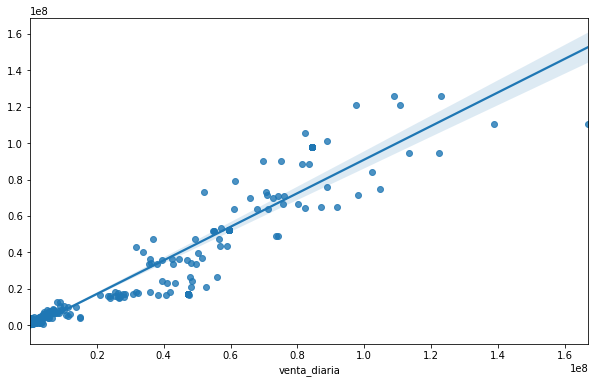

In [47]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test_dummies,y=modelo_xgb.predict(dtest))
plt.show()

<Figure size 1080x864 with 0 Axes>

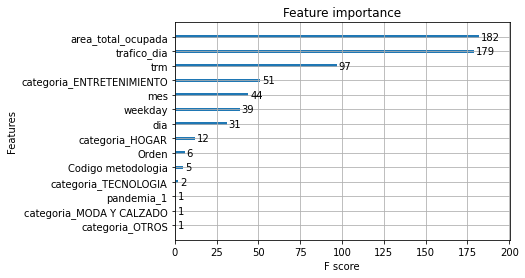

In [48]:
plt.figure(figsize=(15,12))
xgb.plot_importance(modelo_xgb)
plt.show()

El modelo muestra que el area_total_ocupada, el trafico_dia y la trm son variables importantes para explicar las ventas diarias y serían las primeras en ser consideradas en modelos explicativos (paramétricos).

### Modelo Random Forest

In [49]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [50]:
imputer = MissForest()
X_train_imputed = imputer.fit_transform(X_train_dummies)
X_test_imputed = imputer.fit_transform(X_test_dummies)

Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1


El modelo de random forest tiene una particularidad y es que no admite valores faltantes, por lo que usaremos la librería MissForest (Missing imputation random forest) para imputar los mismos.

In [51]:
modelo_rf = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
)
modelo_rf.fit(X_train_imputed, y_train_dummies)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=123)

In [52]:
regression_report(y_test_dummies, modelo_rf.predict(X_test_imputed))

Metrics for regression:
      mean absolute error:         13195596.978
    median absolute error:          5732858.007
       mean squared error:  565694126093084.750
                max error:        125629334.804
                 r2 score:                0.469
 explained variance score:                0.476


[('mean absolute error', 13195596.97813115),
 ('median absolute error', 5732858.006818547),
 ('mean squared error', 565694126093084.8),
 ('max error', 125629334.80404374),
 ('r2 score', 0.46858334716661165),
 ('explained variance score', 0.4762602183377451)]

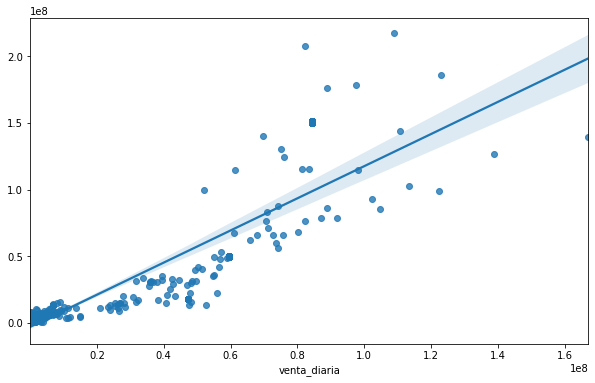

In [53]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test_dummies,y=modelo_rf.predict(X_test_imputed))
plt.show()

El modelo subestima las ventas en general, según el reporte, el promedio del error absoluto es de 13 millones, que de entrada comparándolo contra el XGBoost, nos inclinamos por el XGBoost por su desempeño.

### Modelo regresión lineal múltiple

La ventaja de un modelo paramétrico sobre los anteriores, es la interpretabilidad, al tener coeficientes interpretables, podemos obtener conocimiento de negocio muy valioso, por lo que usaremos un modelo de regresión múltiple:

In [54]:
import statsmodels.api as sm

In [55]:
model = sm.OLS(y_train_dummies, X_train_imputed)
results = model.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           venta_diaria   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1236.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:26:27   Log-Likelihood:            -1.3730e+05
No. Observations:                7489   AIC:                         2.746e+05
Df Residuals:                    7472   BIC:                         2.748e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4389.0193    144.868     30.297      0.0

El modelo muestra cosas interesantes, por ejemplo, 
* por cada persona adicional en el tráfico día, las ventas diarias aumentan en promedio COP 4300, esto mientras las demás permanecen constantes.
* por cada metro cuadrado adicional, las ventas diarias aumentan en promedio COP 1550 pesos aproximadamente.


In [57]:
regression_report(y_test_dummies,results.predict(X_test_imputed))

Metrics for regression:
      mean absolute error:         12152703.078
    median absolute error:         10937750.671
       mean squared error:  211821279093181.406
                max error:         65480086.749
                 r2 score:                0.801
 explained variance score:                0.842


[('mean absolute error', 12152703.078308502),
 ('median absolute error', 10937750.671139438),
 ('mean squared error', 211821279093181.4),
 ('max error', 65480086.74932453),
 ('r2 score', 0.8010137458700378),
 ('explained variance score', 0.8422803489159867)]

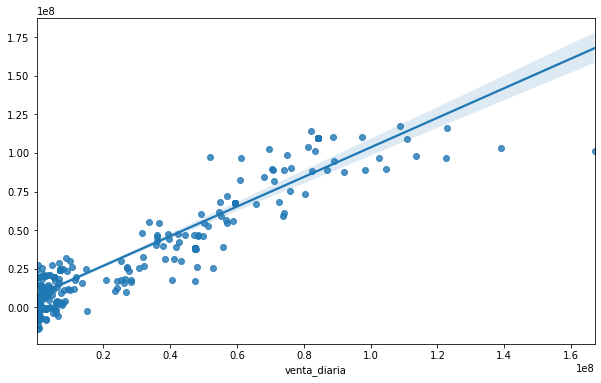

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test_dummies,y=results.predict(X_test_imputed))
plt.show()

El desempeño del modelo es mejor que el RandomForest y menor la XGBoost.

## Conclusión modelamiento

Desde las métricas, especialmente el $R^2$ de los modelos, tenemos que:

XGBoost: 0.87 \
RandomForest: 0.46 \
Linear Regression: 0.8 \
Es decir que podríamos escoger en primera instancia el XGBoost por su buen desempeño en el conjunto de testeo, esto si el interés es la predicción más que en el entendimiento del problema.

Por otro lado, el modelo de regresión lineal tuvo un desempeño muy bueno y tiene una ventaja sobre el XGBoost: Tiene más elementos interpretables, los cuales aportan conocimiento valioso al negocio y permite concluir respecto a los parámetros $\beta$ de la regresión, lo que permitiría hacer un planeamiento y una prescripción.

Dado este contexto, el mejor modelo es el de regresión lineal múltiple, seguido del modelo de XGBoost.